In [ ]:
# Reinforcement Learning with SARSA and Q-Learning
## part a ---> find value function using TD method

In [3]:
import numpy as np
import matplotlib.pyplot as plt

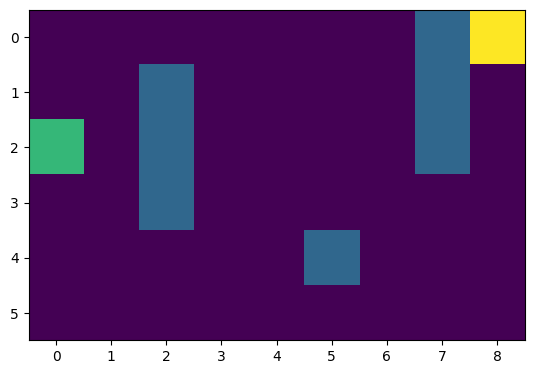

In [4]:
# constants
gamma = 0.9
alpha = 0.9
epsilon = 0.1
# value dunction
V = np.zeros([6, 9])
# map ---> 0 = free, 1 = obsticle, 2 = start, 3 = end
map = np.array([[0, 0, 0, 0, 0, 0, 0, 1, 3],
                [0, 0, 1, 0, 0, 0, 0, 1, 0],
                [2, 0, 1, 0, 0, 0, 0, 1, 0],
                [0, 0, 1, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 1, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0]])
plt.imshow(map)

In [3]:
class value_function_TD():
    def __init__(self, map, error=0.01):
        self.map = map
        self.error = error
        # constants
        self.gamma = 0.9
        self.alpha = 0.9
        self.epsilon = 0.1
        # find start and end states
        self.state = np.where(self.map == 2)
        self.end_state = np.where(self.map == 3)
        self.is_done = False
        self.V = np.zeros([6, 9])

    def get_action(self):
        action = np.random.randint(0, 4)
        return action

    def get_next_state(self, state, action):
        if action == 0:
            next_state = [state[0]-1, state[1]]
        elif action == 1:
            next_state = [state[0], state[1]+1]
        elif action == 2:
            next_state = [state[0]+1, state[1]]
        elif action == 3:
            next_state = [state[0], state[1]-1]
        # check if next state is valid
        if next_state[0] < 0 or next_state[0] > 5 or next_state[1] < 0 or next_state[1] > 8:
            next_state = state
        elif self.map[next_state[0], next_state[1]] == 1:
            next_state = state
        return next_state

    def reset(self):
        self.state = np.where(self.map == 2)
        self.is_done = False

    def step(self):
        action = self.get_action()
        next_state = self.get_next_state(self.state, action)
        # define reward
        if next_state[0] == self.end_state[0] and next_state[1] == self.end_state[1]:
            reward = 0
        else:
            reward = -1
        V = np.copy(self.V)
        if self.state == self.end_state:
            V[self.state] = 0
            self.is_done = True
        V[self.state[0], self.state[1]] = V[self.state[0], self.state[1]] + self.alpha*(reward + self.gamma*V[next_state[0], next_state[1]]-V[self.state[0], self.state[1]])
        if self.state == self.end_state:
            V[self.state] = 0
            self.is_done = True
            print('hi')
        V[self.end_state] = 0
        self.state = [next_state[0], next_state[1]]
        return V

    def run(self):
        while self.is_done == False:
            V = self.step()
            # stop if error is less than threshold
            if np.max(np.abs(V - self.V)) < self.error:
                break
            plt.imshow(V)
            plt.show()
            self.V = np.copy(V)
        self.reset()



In [ ]:
diane = value_function_TD(map, error=0.00001)
diane.run()
plt.imshow(diane.V)
plt.savefig('../figure/value_function_TD.png')

In [35]:
## solving maze using SARSA saving number of collisions in each episode, rewards in each episode, and number of steps in each episode, plot the training after 200 and 1000 episodes
class SARSA():
    def __init__(self, map, error=0.01):
        self.map = map
        self.error = error
        # constants
        self.gamma = 0.9
        self.alpha = 0.9
        self.epsilon = 0.1
        # find start and end states
        self.state = np.where(self.map == 2)
        self.end_state = np.where(self.map == 3)
        self.is_done = False
        self.V = np.zeros([6, 9])
        self.Q = np.zeros([6, 9, 4])
        self.steps = 0
        self.collisions = 0
        self.rewards = 0
        self.episode_steps = []
        self.episode_collisions = []
        self.episode_rewards = []
        self.episode_num = 0
        self.step_history = []

    def get_action(self):
        # epsilon greedy
        if np.random.rand() < self.epsilon:
            action = np.random.randint(0, 4)
        else:
            action = np.argmax(self.Q[self.state[0], self.state[1], :])
        return action

    def get_next_state(self, state, action):
        if action == 0:
            next_state = [state[0]-1, state[1]]
        elif action == 1:
            next_state = [state[0], state[1]+1]
        elif action == 2:
            next_state = [state[0]+1, state[1]]
        elif action == 3:
            next_state = [state[0], state[1]-1]
        # check if next state is valid
        if next_state[0] < 0 or next_state[0] > 5 or next_state[1] < 0 or next_state[1] > 8:
            next_state = state
            self.collisions += 1
        elif self.map[next_state[0], next_state[1]] == 1:
            self.collisions += 1
            next_state = state
        return next_state

    def reset(self):
        self.state = np.where(self.map == 2)
        self.is_done = False
        self.steps = 0
        self.collisions = 0
        self.rewards = 0
        self.epsilon *= 0.99

    def step(self):
        action = self.get_action()
        next_state = self.get_next_state(self.state, action)
        # define reward
        if next_state[0] == self.end_state[0] and next_state[1] == self.end_state[1]:
            reward = 0
        else:
            reward = -1
        V = np.copy(self.V)
        if self.state == self.end_state:
            V[self.state] = 0
            self.is_done = True
        V[self.state[0], self.state[1]] = V[self.state[0], self.state[1]] + self.alpha*(reward + self.gamma*V[next_state[0], next_state[1]]-V[self.state[0], self.state[1]])
        if self.state[0] == self.end_state[0] and self.state[1] == self.end_state[1]:
            V[self.state] = 0
            self.is_done = True
        V[self.end_state] = 0
        self.state = [next_state[0], next_state[1]]
        return V
    
    def run(self):
        while self.is_done == False:
            V = self.step()
            if self.episode_num == 200:
                self.step_history.append(self.state)
            if self.episode_num == 997:
                self.step_history = []
            if self.episode_num == 998:
                self.step_history.append(self.state)
            print(self.step_history)
            # stop if error is less than threshold
            if np.max(np.abs(V - self.V)) < self.error:
                break
            plt.imshow(V)
            plt.show()
            self.V = np.copy(V)
        self.reset()

    def run_episode(self):
        self.reset()
        while self.is_done == False:
            if self.episode_num == 199:
                self.step_history.append(self.state)
            # print(self.step_history)
            action = self.get_action()
            self.steps += 1
            next_state = self.get_next_state(self.state, action)
            # print episode num, collision num, reward num
            print(self.episode_num, self.steps, self.collisions, self.rewards)
            # define reward
            if next_state == self.end_state:
                reward = 0
            else:
                reward = -1
            # update Q
            self.Q[self.state[0], self.state[1], action] = self.Q[self.state[0], self.state[1], action] + self.alpha*(reward + self.gamma*self.Q[next_state[0], next_state[1], action]-self.Q[self.state[0], self.state[1], action])
            # update state
            self.state = [next_state[0], next_state[1]]
            # update rewards
            self.rewards += reward
            # check if done
            if self.state[0] == self.end_state[0] and self.state[1] == self.end_state[1]:
                self.is_done = True

        self.episode_num += 1
        # save data
        self.episode_steps.append(self.steps)
        self.episode_collisions.append(self.collisions)
        self.episode_rewards.append(self.rewards)
        # reset
        self.reset()

    def train(self, episodes):
        for i in range(episodes):
            self.run_episode()
            if self.episode_num == 200:
                plt.imshow(map)
                for i in range(len(self.step_history)):
                    plt.plot(self.step_history[i][1], self.step_history[i][0], 'ro')
                plt.savefig('../figure/200_episodes.png')
                plt.show()
            if self.episode_num == 999:
                plt.imshow(map)
                for i in range(len(self.step_history)):
                    plt.plot(self.step_history[i][1], self.step_history[i][0], 'ro')
                plt.savefig('../figure/1000_episodes.png')
                plt.show()

        return self.episode_steps, self.episode_collisions, self.episode_rewards
    
    def plot(self, episodes):
        steps, collisions, rewards = self.train(episodes)
        plt.figure()
        plt.plot(steps)
        plt.xlabel('Episode')
        plt.ylabel('Steps')
        plt.savefig('../figure/steps.png')
        plt.figure()
        plt.plot(collisions)
        plt.xlabel('Episode')
        plt.ylabel('Collisions')
        plt.savefig('../figure/collisions.png')
        plt.figure()
        plt.plot(rewards)
        plt.xlabel('Episode')
        plt.ylabel('Rewards')
        plt.savefig('../figure/rewards.png')


0 1 0 0
0 2 0 -1
0 3 1 -2
0 4 1 -3
0 5 1 -4
0 6 1 -5
0 7 1 -6
0 8 1 -7
0 9 2 -8
0 10 2 -9
0 11 3 -10
0 12 3 -11
0 13 4 -12
0 14 4 -13
0 15 5 -14
0 16 5 -15
0 17 5 -16
0 18 5 -17
0 19 5 -18
0 20 5 -19
0 21 5 -20
0 22 5 -21
0 23 5 -22
0 24 5 -23
0 25 6 -24
0 26 6 -25
0 27 7 -26
0 28 7 -27
0 29 8 -28
0 30 8 -29
0 31 9 -30
0 32 10 -31
0 33 10 -32
0 34 10 -33
0 35 10 -34
0 36 10 -35
0 37 10 -36
0 38 11 -37
0 39 11 -38
0 40 12 -39
0 41 13 -40
0 42 14 -41
0 43 14 -42
0 44 15 -43
0 45 15 -44
0 46 15 -45
0 47 15 -46
0 48 15 -47
0 49 16 -48
0 50 16 -49
0 51 17 -50
0 52 17 -51
0 53 17 -52
0 54 17 -53
0 55 17 -54
0 56 17 -55
0 57 17 -56
0 58 17 -57
0 59 17 -58
0 60 17 -59
0 61 17 -60
0 62 17 -61
0 63 17 -62
0 64 17 -63
0 65 17 -64
0 66 17 -65
0 67 17 -66
0 68 17 -67
0 69 17 -68
0 70 17 -69
0 71 17 -70
0 72 17 -71
0 73 17 -72
0 74 18 -73
0 75 18 -74
0 76 19 -75
0 77 19 -76
0 78 19 -77
0 79 19 -78
1 1 0 0
1 2 1 -1
1 3 1 -2
1 4 1 -3
1 5 1 -4
1 6 1 -5
1 7 1 -6
1 8 2 -7
1 9 2 -8
1 10 2 -9
1 11 2 -10
1 

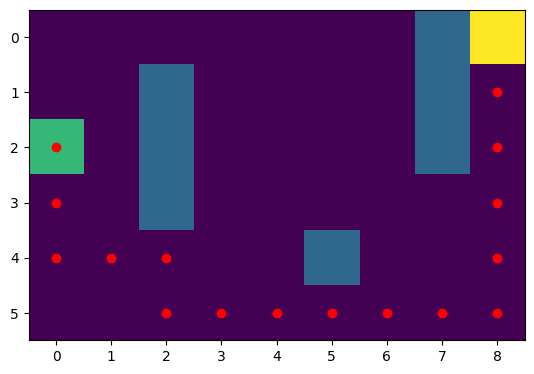

200 1 0 0
200 2 0 -1
200 3 0 -2
200 4 0 -3
200 5 0 -4
200 6 0 -5
200 7 0 -6
200 8 0 -7
200 9 0 -8
200 10 0 -9
200 11 0 -10
200 12 0 -11
200 13 0 -12
200 14 0 -13
200 15 0 -14
200 16 0 -15
201 1 0 0
201 2 0 -1
201 3 0 -2
201 4 0 -3
201 5 0 -4
201 6 0 -5
201 7 0 -6
201 8 0 -7
201 9 0 -8
201 10 0 -9
201 11 0 -10
201 12 0 -11
201 13 0 -12
201 14 0 -13
201 15 0 -14
201 16 0 -15
202 1 0 0
202 2 0 -1
202 3 0 -2
202 4 0 -3
202 5 0 -4
202 6 0 -5
202 7 0 -6
202 8 0 -7
202 9 0 -8
202 10 0 -9
202 11 0 -10
202 12 0 -11
202 13 0 -12
202 14 0 -13
202 15 0 -14
202 16 0 -15
203 1 0 0
203 2 0 -1
203 3 0 -2
203 4 0 -3
203 5 0 -4
203 6 0 -5
203 7 0 -6
203 8 0 -7
203 9 0 -8
203 10 0 -9
203 11 0 -10
203 12 0 -11
203 13 0 -12
203 14 0 -13
203 15 0 -14
203 16 0 -15
204 1 0 0
204 2 0 -1
204 3 0 -2
204 4 0 -3
204 5 0 -4
204 6 0 -5
204 7 0 -6
204 8 0 -7
204 9 0 -8
204 10 0 -9
204 11 0 -10
204 12 0 -11
204 13 0 -12
204 14 0 -13
204 15 0 -14
204 16 0 -15
205 1 0 0
205 2 0 -1
205 3 0 -2
205 4 0 -3
205 5 0 -4
205 6 

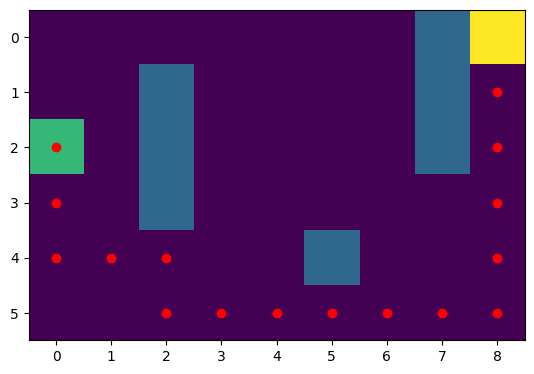

999 1 0 0
999 2 0 -1
999 3 0 -2
999 4 0 -3
999 5 0 -4
999 6 0 -5
999 7 0 -6
999 8 0 -7
999 9 0 -8
999 10 0 -9
999 11 0 -10
999 12 0 -11
999 13 0 -12
999 14 0 -13
999 15 0 -14
999 16 0 -15


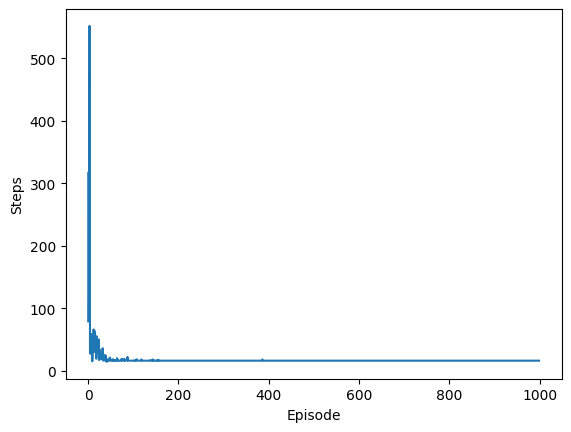

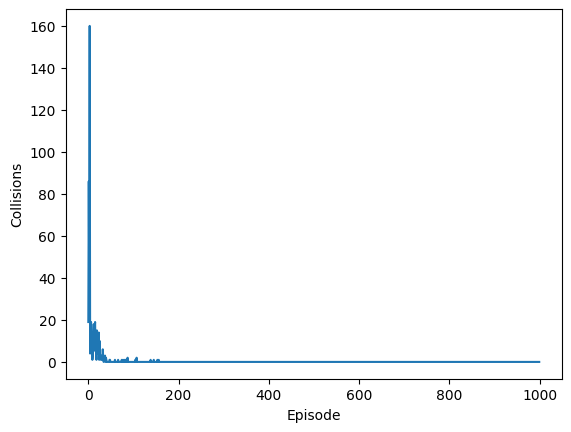

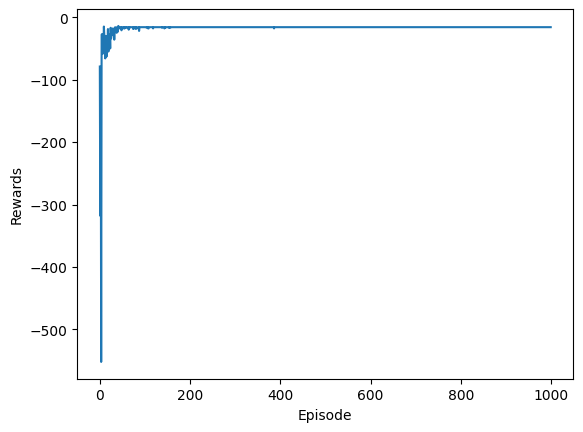

In [36]:
diane = SARSA(map, error=0.00001)
diane.plot(1000)

In [32]:
## solving maze using SARSA saving number of collisions in each episode, rewards in each episode, and number of steps in each episode, plot the training after 200 and 1000 episodes
class Q_learning():
    def __init__(self, map, error=0.01):
        self.map = map
        self.error = error
        # constants
        self.gamma = 0.9
        self.alpha = 0.9
        self.epsilon = 0.1
        # find start and end states
        self.state = np.where(self.map == 2)
        self.end_state = np.where(self.map == 3)
        self.is_done = False
        self.V = np.zeros([6, 9])
        self.Q = np.zeros([6, 9, 4])
        self.steps = 0
        self.collisions = 0
        self.rewards = 0
        self.episode_steps = []
        self.episode_collisions = []
        self.episode_rewards = []
        self.episode_num = 0
        self.step_history = []

    def get_action(self):
        # epsilon greedy
        if np.random.rand() < self.epsilon:
            action = np.random.randint(0, 4)
        else:
            action = np.argmax(self.Q[self.state[0], self.state[1], :])
        return action

    def get_next_state(self, state, action):
        if action == 0:
            next_state = [state[0]-1, state[1]]
        elif action == 1:
            next_state = [state[0], state[1]+1]
        elif action == 2:
            next_state = [state[0]+1, state[1]]
        elif action == 3:
            next_state = [state[0], state[1]-1]
        # check if next state is valid
        if next_state[0] < 0 or next_state[0] > 5 or next_state[1] < 0 or next_state[1] > 8:
            next_state = state
            self.collisions += 1
        elif self.map[next_state[0], next_state[1]] == 1:
            self.collisions += 1
            next_state = state
        return next_state

    def reset(self):
        self.state = np.where(self.map == 2)
        self.is_done = False
        self.steps = 0
        self.collisions = 0
        self.rewards = 0
        self.epsilon *= 0.99

    def step(self):
        action = self.get_action()
        next_state = self.get_next_state(self.state, action)
        # define reward
        if next_state[0] == self.end_state[0] and next_state[1] == self.end_state[1]:
            reward = 0
        else:
            reward = -1
        V = np.copy(self.V)
        if self.state == self.end_state:
            V[self.state] = 0
            self.is_done = True
        self.Q[self.state[0], self.state[1], action] = self.Q[self.state[0], self.state[1], action] + self.alpha*(reward + self.gamma*np.max(self.Q[next_state[0], next_state[1], :])-self.Q[self.state[0], self.state[1], action])
        if self.state[0] == self.end_state[0] and self.state[1] == self.end_state[1]:
            V[self.state] = 0
            self.is_done = True
        V[self.end_state] = 0
        self.state = [next_state[0], next_state[1]]
        return V
    
    def run(self):
        while self.is_done == False:
            V = self.step()
            if self.episode_num == 200:
                self.step_history.append(self.state)
            if self.episode_num == 997:
                self.step_history = []
            if self.episode_num == 998:
                self.step_history.append(self.state)
            print(self.step_history)
            # stop if error is less than threshold
            if np.max(np.abs(V - self.V)) < self.error:
                break
            plt.imshow(V)
            plt.show()
            self.V = np.copy(V)
        self.reset()

    def run_episode(self):
        self.reset()
        while self.is_done == False:
            if self.episode_num == 199:
                self.step_history.append(self.state)
            # print(self.step_history)
            action = self.get_action()
            self.steps += 1
            next_state = self.get_next_state(self.state, action)
            # print episode num, collision num, reward num
            print(self.episode_num, self.steps, self.collisions, self.rewards)
            # define reward
            if next_state == self.end_state:
                reward = 0
            else:
                reward = -1
            # update Q
            self.Q[self.state[0], self.state[1], action] = self.Q[self.state[0], self.state[1], action] + self.alpha*(reward + self.gamma*self.Q[next_state[0], next_state[1], action]-self.Q[self.state[0], self.state[1], action])
            # update state
            self.state = [next_state[0], next_state[1]]
            # update rewards
            self.rewards += reward
            # check if done
            if self.state[0] == self.end_state[0] and self.state[1] == self.end_state[1]:
                self.is_done = True

        self.episode_num += 1
        # save data
        self.episode_steps.append(self.steps)
        self.episode_collisions.append(self.collisions)
        self.episode_rewards.append(self.rewards)
        # reset
        self.reset()

    def train(self, episodes):
        for i in range(episodes):
            self.run_episode()
            if self.episode_num == 200:
                plt.imshow(map)
                for i in range(len(self.step_history)):
                    plt.plot(self.step_history[i][1], self.step_history[i][0], 'ro')
                plt.savefig('../figure/200_episodes_Q.png')
                plt.show()
            if self.episode_num == 999:
                plt.imshow(map)
                for i in range(len(self.step_history)):
                    plt.plot(self.step_history[i][1], self.step_history[i][0], 'ro')
                plt.savefig('../figure/1000_episodes_Q.png')
                plt.show()

        return self.episode_steps, self.episode_collisions, self.episode_rewards
    
    def plot(self, episodes):
        steps, collisions, rewards = self.train(episodes)
        plt.figure()
        plt.plot(steps)
        plt.xlabel('Episode')
        plt.ylabel('Steps')
        plt.savefig('../figure/steps_Q.png')
        plt.figure()
        plt.plot(collisions)
        plt.xlabel('Episode')
        plt.ylabel('Collisions')
        plt.savefig('../figure/collisions_Q.png')
        plt.figure()
        plt.plot(rewards)
        plt.xlabel('Episode')
        plt.ylabel('Rewards')
        plt.savefig('../figure/rewards_Q.png')


0 1 0 0
0 2 0 -1
0 3 1 -2
0 4 1 -3
0 5 2 -4
0 6 2 -5
0 7 3 -6
0 8 3 -7
0 9 3 -8
0 10 4 -9
0 11 4 -10
0 12 4 -11
0 13 4 -12
0 14 4 -13
0 15 4 -14
0 16 4 -15
0 17 5 -16
0 18 5 -17
0 19 5 -18
0 20 5 -19
0 21 5 -20
0 22 5 -21
0 23 6 -22
0 24 6 -23
0 25 6 -24
0 26 6 -25
0 27 6 -26
0 28 6 -27
0 29 7 -28
0 30 7 -29
0 31 8 -30
0 32 8 -31
0 33 9 -32
0 34 10 -33
0 35 10 -34
0 36 11 -35
0 37 11 -36
0 38 12 -37
0 39 12 -38
0 40 13 -39
0 41 13 -40
0 42 14 -41
0 43 14 -42
0 44 15 -43
0 45 15 -44
0 46 16 -45
0 47 17 -46
0 48 17 -47
0 49 17 -48
0 50 17 -49
0 51 17 -50
0 52 17 -51
0 53 17 -52
0 54 18 -53
0 55 19 -54
0 56 19 -55
0 57 20 -56
0 58 20 -57
0 59 20 -58
0 60 20 -59
0 61 20 -60
0 62 20 -61
0 63 20 -62
0 64 21 -63
0 65 21 -64
0 66 22 -65
0 67 22 -66
0 68 22 -67
0 69 22 -68
0 70 22 -69
0 71 23 -70
0 72 23 -71
0 73 23 -72
0 74 24 -73
0 75 24 -74
0 76 24 -75
0 77 24 -76
0 78 24 -77
1 1 0 0
1 2 1 -1
1 3 1 -2
1 4 2 -3
1 5 2 -4
1 6 2 -5
1 7 2 -6
1 8 3 -7
1 9 3 -8
1 10 3 -9
1 11 3 -10
1 12 3 -11
1 13 

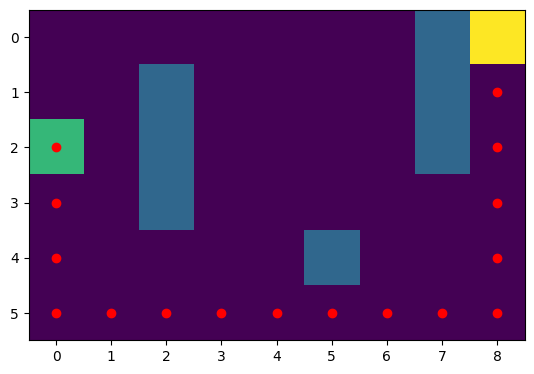

200 1 0 0
200 2 0 -1
200 3 0 -2
200 4 0 -3
200 5 0 -4
200 6 0 -5
200 7 0 -6
200 8 0 -7
200 9 0 -8
200 10 0 -9
200 11 0 -10
200 12 0 -11
200 13 0 -12
200 14 0 -13
200 15 0 -14
200 16 0 -15
201 1 0 0
201 2 0 -1
201 3 0 -2
201 4 0 -3
201 5 0 -4
201 6 0 -5
201 7 0 -6
201 8 0 -7
201 9 0 -8
201 10 0 -9
201 11 0 -10
201 12 0 -11
201 13 0 -12
201 14 0 -13
201 15 0 -14
201 16 0 -15
202 1 0 0
202 2 0 -1
202 3 0 -2
202 4 0 -3
202 5 0 -4
202 6 0 -5
202 7 0 -6
202 8 0 -7
202 9 0 -8
202 10 0 -9
202 11 0 -10
202 12 0 -11
202 13 0 -12
202 14 0 -13
202 15 0 -14
202 16 0 -15
203 1 0 0
203 2 0 -1
203 3 0 -2
203 4 0 -3
203 5 0 -4
203 6 0 -5
203 7 0 -6
203 8 0 -7
203 9 0 -8
203 10 0 -9
203 11 0 -10
203 12 0 -11
203 13 0 -12
203 14 0 -13
203 15 0 -14
203 16 0 -15
204 1 0 0
204 2 0 -1
204 3 0 -2
204 4 0 -3
204 5 0 -4
204 6 0 -5
204 7 0 -6
204 8 0 -7
204 9 0 -8
204 10 0 -9
204 11 0 -10
204 12 0 -11
204 13 0 -12
204 14 0 -13
204 15 0 -14
204 16 0 -15
205 1 0 0
205 2 0 -1
205 3 0 -2
205 4 0 -3
205 5 0 -4
205 6 

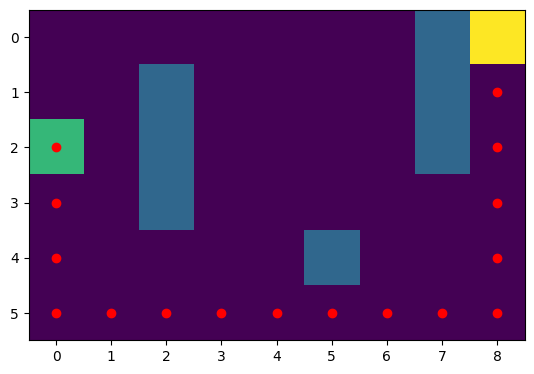

999 1 0 0
999 2 0 -1
999 3 0 -2
999 4 0 -3
999 5 0 -4
999 6 0 -5
999 7 0 -6
999 8 0 -7
999 9 0 -8
999 10 0 -9
999 11 0 -10
999 12 0 -11
999 13 0 -12
999 14 0 -13
999 15 0 -14
999 16 0 -15


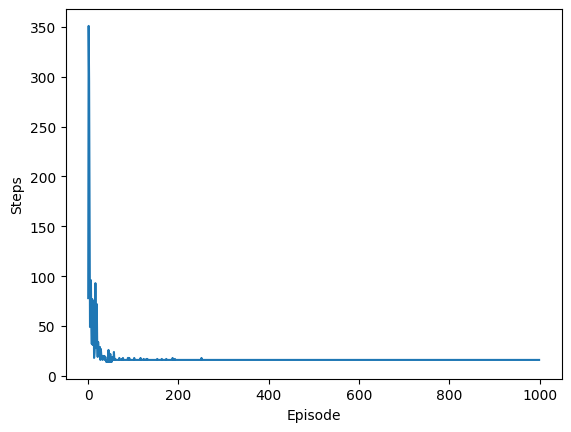

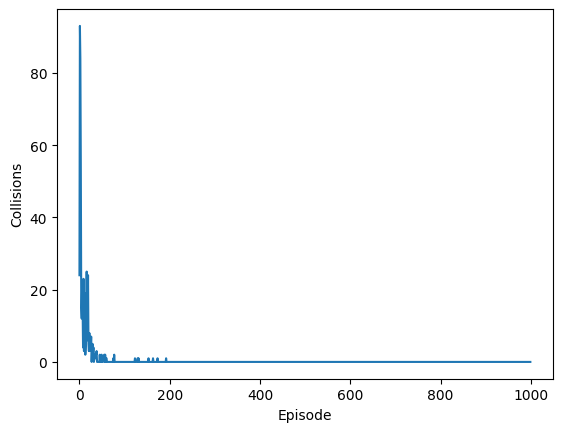

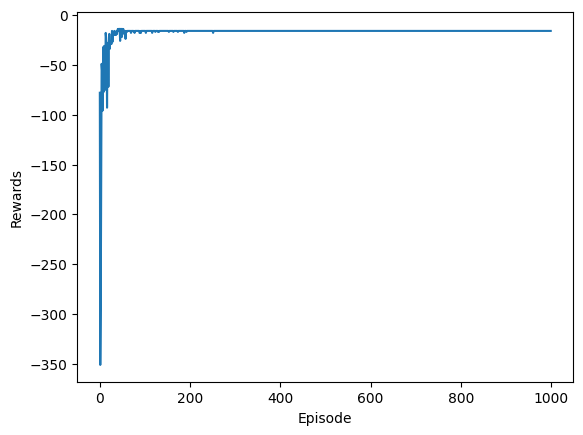

In [33]:
diane = Q_learning(map, error=0.00001)
diane.plot(1000)

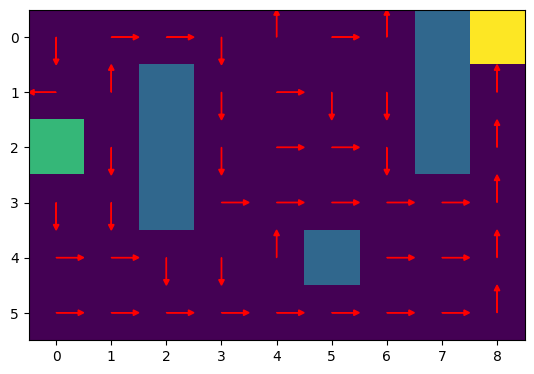

In [37]:
# plot policy
plt.imshow(map)
for i in range(6):
    for j in range(9):
        if map[i, j] == 0:
            # find action vector
            action = np.argmax(diane.Q[i, j, :])
            if action == 0:
                plt.arrow(j, i, 0, -0.4, head_width=0.1, head_length=0.1, color='r')
            elif action == 1:
                plt.arrow(j, i, 0.4, 0, head_width=0.1, head_length=0.1, color='r')
            elif action == 2:
                plt.arrow(j, i, 0, 0.4, head_width=0.1, head_length=0.1, color='r')
            elif action == 3:
                plt.arrow(j, i, -0.4, 0, head_width=0.1, head_length=0.1, color='r') 
plt.savefig('../figure/policy.png')